In [4]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Gunderao"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Gunderao"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Gunderao

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Gunderao

I want to learn about the best place to see Orcas in the US.


In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [6]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="llama3-70b-8192")
result=llm.invoke(messages)
result

AIMessage(content='Orcas, also known as killer whales, are an iconic and fascinating species. \n\nIn the US, one of the best places to see orcas in their natural habitat is in the Pacific Northwest, particularly in the waters of Washington State and Oregon. Here are some top spots:\n\n1. **Puget Sound, Washington**: The southern resident orcas, also known as the Salish Sea orcas, can be found in Puget Sound, which is located near Seattle. This population is sadly endangered, but there are still opportunities to see them with guided tours.\n2. **San Juan Islands, Washington**: The San Juan Islands are a popular spot for orca sightings, with many tour operators offering guided tours. The islands are located about 100 miles north of Seattle.\n3. **Olympic Peninsula, Washington**: The Olympic Peninsula is another great location for orca sightings, particularly around the towns of Port Angeles and Sequim.\n4. **Oregon Coast**: While less frequent, orca sightings can also occur along the Ore

In [7]:
def add(a:int,b:int)-> int:
    return a+b

In [8]:
llm_with_tools=llm.bind_tools([add])

In [9]:
tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 2 plus 3", name="Gunderao")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'k67xs0ebz', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 894, 'total_tokens': 930, 'completion_time': 0.142584063, 'prompt_time': 0.028462043, 'queue_time': 0.273186187, 'total_time': 0.171046106}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_bf16903a67', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e9ba8a06-18c0-44bd-b621-be49f431ab25-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 3}, 'id': 'k67xs0ebz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 894, 'output_tokens': 36, 'total_tokens': 930})

In [10]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 3},
  'id': 'k67xs0ebz',
  'type': 'tool_call'}]

In [11]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

class MessageState(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [12]:
initial_message=[AIMessage(content="Hello! How can I assist you?", name="Model"),
                HumanMessage(content="I'm looking for information on generative ai.", name="GUnderao")
                   ]
# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

add_messages(initial_message,new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='52c0ceae-4587-468f-a777-ec5f61c5baeb'),
 HumanMessage(content="I'm looking for information on generative ai.", additional_kwargs={}, response_metadata={}, name='GUnderao', id='805bd045-d9ff-4faa-b46d-999c6068eaac'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='faee7606-ddd0-4674-9f4d-d9014f979939')]

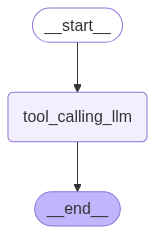

In [13]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
    
# Node
def tool_calling_llm(state: MessageState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessageState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
messages=graph.invoke({"messages":HumanMessage(content="What is 2 minus 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 2 minus 3
================================== Ai Message ==================================
Tool Calls:
  add (3aqd57y6v)
 Call ID: 3aqd57y6v
  Args:
    a: 2
    b: -3


In [15]:
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [16]:
from langchain_openai import ChatOpenAI

def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

In [17]:
llm_with_tools = llm.bind_tools([multiply])

In [18]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState


# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [19]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
llm_with_tools=llm.bind_tools([multiply])

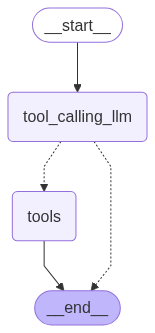

In [20]:
# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([multiply]))
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Hello, what is 2 multiplied by 2? .")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello, what is 2 multiplied by 2? .
================================== Ai Message ==================================
Tool Calls:
  multiply (78s6mnypq)
 Call ID: 78s6mnypq
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: multiply

4
